In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
ff_data_list = []

for year in range(2002, 2019):
    ff_data = pd.read_csv('FF offense '+str(year)+'.csv')
    ff_data['YEAR'] = year
    
    # Remove injury designation from NAME column.
    for N in ff_data.NAME:
        if N[-2:] == ' P' or N[-2:] == ' O' or N[-2:] == ' Q' or N[-2:] == ' D':
            ff_data.NAME = ff_data.NAME.replace(N, N[:-2])
        if N[-3:] == ' IR':
            ff_data.NAME = ff_data.NAME.replace(N, N[:-3])
        if N[-4:] == ' SUS':
            ff_data.NAME = ff_data.NAME.replace(N, N[:-4])
            
    # Correct innaccurate position labels in POS column    
    no_qb = ff_data[ff_data.POS != 'QB']
    no_qb = no_qb[no_qb['PASS YDS'] > 106]
    index_ = no_qb.index.values
    
    for p in no_qb.POS:
        no_qb.POS = no_qb.POS.replace(p, 'QB')
        
    for i in index_:
        ff_data.loc[i] = no_qb.loc[i]
         
    ff_data_list.append(ff_data)

ff_data_list.reverse()
ALL = pd.concat(ff_data_list)
ALL = ALL.reset_index(drop=True)
ALL = ALL[ALL.POS != 'FB']
#ALL = ALL[['YEAR', 'RANK', 'NAME', 'TEAM', 'POS', 'PTS']]

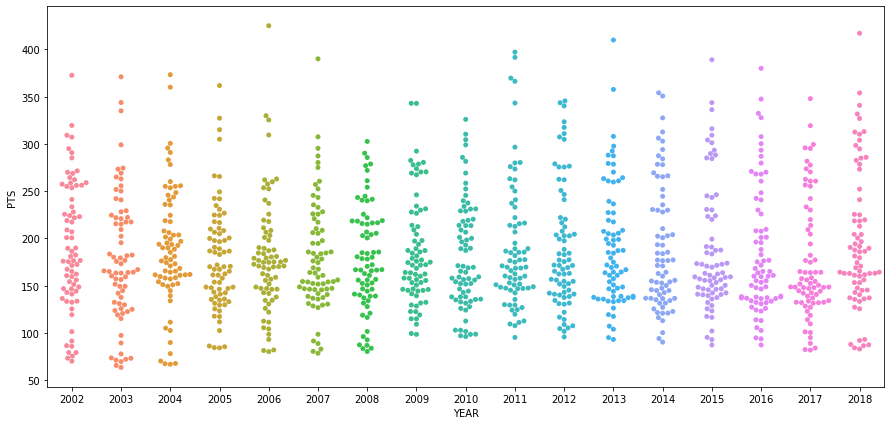

In [186]:
starter = []
position = ['QB', 'RB', 'WR', 'TE']

for year in range(2002, 2019):
    df = ALL[ALL.YEAR == year].copy()
    for pos in position:
        if pos == 'QB' or pos == 'TE':
            starter.append(df[df.POS == pos][:12])
        else:
            starter.append(df[df.POS == pos][:24])
    
TOP = pd.concat(starter)
TOP = TOP.reset_index(drop=True)

list1 = []
for year in range(2002, 2019):
    DF = TOP[TOP.YEAR == year]
    list1.append(DF)
    
plt.figure(figsize=(15,7))
sns.swarmplot(x='YEAR', y='PTS', data=pd.concat(list1))
plt.show()

In [182]:
# Draft simulation based purely on final scoring.

df_year = ALL[ALL.YEAR == 2018].copy()

teams = [([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], [])]

for i in range(72):
    for team in teams:
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            team[0].append(df_year.loc[df_year.index.min()])
            team[1].append(df_year.loc[df_year.index.min()].POS)
            df_year = df_year.drop(df_year.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'QB']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'RB']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'WR']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'TE']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'RB']
            df = df[df.POS != 'WR']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'QB']
            df = df[df.POS != 'WR']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'TE']
            df = df[df.POS != 'RB']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'TE']
            df = df[df.POS != 'WR']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'QB']
            df = df[df.POS != 'TE']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'QB']
            df = df[df.POS != 'RB']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'WR']
            df = df[df.POS != 'RB']
            df = df[df.POS != 'TE']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'WR']
            df = df[df.POS != 'QB']
            df = df[df.POS != 'TE']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'RB']
            df = df[df.POS != 'QB']
            df = df[df.POS != 'TE']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'RB']
            df = df[df.POS != 'QB']
            df = df[df.POS != 'WR']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
    teams.reverse()
    
league = []
for team in teams:
    TEAM = pd.DataFrame(team[0])
    league.append(TEAM)

pts_sums = []
QB_pts = []
RB_pts = []
WR_pts = []
TE_pts = []

for team in league:
    pts_sums.append(team.PTS.sum())
    QB_pts.append(team[team.POS == 'QB'].PTS.item())
    RB_pts.append(team[team.POS == 'RB'].PTS.sum())
    WR_pts.append(team[team.POS == 'WR'].PTS.sum())
    TE_pts.append(team[team.POS == 'TE'].PTS.item())
    
team_names = ['TEAM 1', 'TEAM 2', 'TEAM 3', 'TEAM 4', 'TEAM 5', 'TEAM 6', 
              'TEAM 7', 'TEAM 8', 'TEAM 9', 'TEAM 10', 'TEAM 11', 'TEAM 12']
    
data = {'TEAM': team_names, 'TOTAL PTS': pts_sums, 'QB PTS': QB_pts, 
        'RB PTS': RB_pts, 'WR PTS': WR_pts, 'TE PTS': TE_pts}
league_stats = pd.DataFrame(data).sort_values('TOTAL PTS', ascending=False)
league_stats['LEAGUE RNK'] = range(1,13)
league_stats = league_stats[['TEAM', 'LEAGUE RNK', 'TOTAL PTS', 'QB PTS', 'RB PTS', 'WR PTS', 'TE PTS']]
league_stats

,TEAM,LEAGUE RNK,TOTAL PTS,QB PTS,RB PTS,WR PTS,TE PTS
5,TEAM 6,1,1240.44,282.60,448.60,317.64,191.6
0,TEAM 1,2,1240.08,417.08,322.70,417.30,83.0
1,TEAM 2,3,1223.02,353.96,367.14,345.72,156.2
9,TEAM 10,4,1205.20,298.42,459.56,276.52,170.7
11,TEAM 12,5,1188.06,285.86,459.90,316.70,125.6
6,TEAM 7,6,1171.70,312.58,370.90,323.92,164.3
10,TEAM 11,7,1170.52,285.02,469.30,323.10,93.1
2,TEAM 3,8,1167.06,340.86,360.40,381.60,84.2
3,TEAM 4,9,1150.80,331.70,349.80,382.80,86.5
4,TEAM 5,10,1144.42,326.92,372.60,357.50,87.4


In [8]:
league[5]

,YEAR,RANK,NAME,TEAM,POS,PTS
5,2018,6,Todd Gurley,LAR,RB,313.10
13,2018,14,Cam Newton,CAR,QB,282.60
40,2018,41,Travis Kelce,KC,TE,191.60
58,2018,58,Stefon Diggs,MIN,WR,164.30
68,2018,69,Odell Beckham Jr,NYG,WR,153.34
81,2018,82,Matt Breida,SF,RB,135.50


In [190]:
# Draft simulation based purely on final scoring with randomness run 1000 times.

pick_range = 9
winners_by_year = []

for year in range(2002, 2019):
    winners = []
    for draft in range(0,1000):
        df_year = ALL[ALL.YEAR == year].copy()

        teams = [([], []),
                 ([], []),
                 ([], []),
                 ([], []),
                 ([], []),
                 ([], []),
                 ([], []),
                 ([], []),
                 ([], []),
                 ([], []),
                 ([], []),
                 ([], [])]

        for i in range(72):
            for team in teams:
                if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
                    pick = df_year[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
                    df = df_year[df_year.POS != 'QB']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
                    df = df_year[df_year.POS != 'RB']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
                    df = df_year[df_year.POS != 'WR']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
                    df = df_year[df_year.POS != 'TE']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
                    df = df_year[df_year.POS != 'RB']
                    df = df[df.POS != 'WR']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
                    df = df_year[df_year.POS != 'QB']
                    df = df[df.POS != 'WR']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
                    df = df_year[df_year.POS != 'TE']
                    df = df[df.POS != 'RB']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
                    df = df_year[df_year.POS != 'TE']
                    df = df[df.POS != 'WR']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
                    df = df_year[df_year.POS != 'QB']
                    df = df[df.POS != 'TE']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
                    df = df_year[df_year.POS != 'QB']
                    df = df[df.POS != 'RB']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
                    df = df_year[df_year.POS != 'WR']
                    df = df[df.POS != 'RB']
                    df = df[df.POS != 'TE']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
                    df = df_year[df_year.POS != 'WR']
                    df = df[df.POS != 'QB']
                    df = df[df.POS != 'TE']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
                    df = df_year[df_year.POS != 'RB']
                    df = df[df.POS != 'QB']
                    df = df[df.POS != 'TE']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
                if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
                    df = df_year[df_year.POS != 'RB']
                    df = df[df.POS != 'QB']
                    df = df[df.POS != 'WR']
                    pick = df[:pick_range].sample().index.item()
                    team[0].append(df_year.loc[pick])
                    team[1].append(df_year.loc[pick].POS)
                    df_year = df_year.drop(pick)
                    continue
            teams.reverse()

        league2 = []
        for team in teams:
            TEAM = pd.DataFrame(team[0])
            league2.append(TEAM)

        pts_sums = []
        most_points = 0
        for team in league2:
            pts_sums.append(team.PTS.sum())
            if team.PTS.sum() > most_points:
                most_points = team.PTS.sum()
                best_team = team

        winners.append(best_team)
    winners_by_year.append(winners)

In [360]:
winner_stats = []
player_counts = []
for i in range(17):
    D = pd.concat(winners_by_year[i])
    means = D.groupby('POS').PTS.mean()
    percent_of_means = means/means.sum()*100
    sums = D.groupby('POS').PTS.sum()
    percent_of_sums = sums/sums.sum()*100
    stats = [means, percent_of_means, percent_of_sums]
    winner_stats.append(stats)
    player_counts.append((D.NAME.value_counts()/10).head(10))

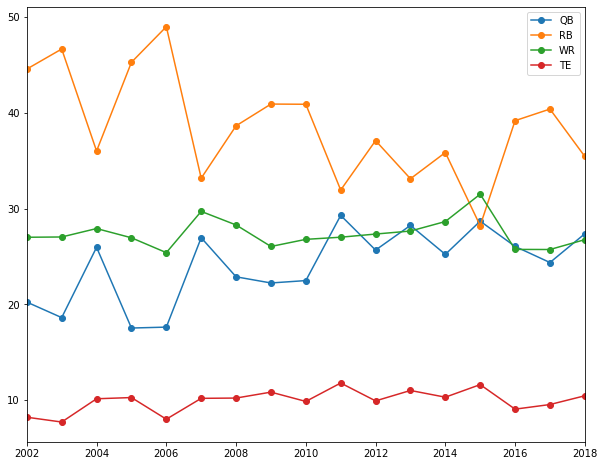

In [361]:
positions = ['QB', 'RB', 'WR', 'TE']
player_means = []

for pos in positions:
    list1 = []
    for i in range(17):
        list1.append(winner_stats[i][2][pos])
    player_means.append(list1)
    
player_means_yr = pd.DataFrame({'QB': player_means[0], 'RB': player_means[1], 
                                'WR': player_means[2], 'TE': player_means[3]})
player_means_yr.index = range(2002, 2019)
player_means_yr.plot(figsize=(10,8), marker='o')
plt.show()

In [419]:
player_counts[7]

Chris Johnson         62.5
Aaron Rodgers         18.6
Steve Smith           18.1
Adrian Peterson       13.6
Maurice Jones-Drew    12.2
Brent Celek           11.6
Dallas Clark          11.5
Antonio Gates         10.7
Andre Johnson         10.1
Frank Gore             9.8
Name: NAME, dtype: float64

In [363]:
performances = []
for j in range(3):
    most_occuring = []
    percents = []
    most_position = []
    for i in range(len(player_counts)):
        most_occuring.append(player_counts[i].index[j])
        percents.append(player_counts[i][j])
    for name in most_occuring:
        most_position.append(ALL[ALL.NAME == name].POS.unique().item())
    data = {'NAME': most_occuring, 'POS': most_position, 'OWNED BY %': percents}
    best = pd.DataFrame(data)
    performances.append(best)

In [364]:
# X = performances[0].copy()
# print(X.POS.value_counts()/performances[0].POS.count()*100)
# print(X.POS.value_counts())

RB    64.705882
QB    35.294118
Name: POS, dtype: float64
RB    11
QB     6
Name: POS, dtype: int64


In [365]:
# pos = []

# DDFF = pd.concat(player_counts).to_frame()
# DDFF = DDFF.reset_index()
# DDFF = DDFF.rename(columns={"index": "NAME", "NAME": "PERCENTS"})
# for name in DDFF.NAME:
#         pos.append(ALL[ALL.NAME == name].POS.unique().item())
        
# P = pd.Series(pos)
# print(P.value_counts())
# print(P.value_counts()/len(P)*100)

RB    67
TE    45
QB    29
WR    29
dtype: int64
RB    39.411765
TE    26.470588
QB    17.058824
WR    17.058824
dtype: float64


In [420]:
ALL[ALL.NAME == 'Chris Johnson']

,RANK,NAME,TEAM,POS,GMS,PASS YDS,PASS TDS,INT,RUSH YDS,RUSH TDS,REC,REC YDS,REC TDS,FUM LST,PTS / GM,PTS,YEAR
1017,118,Chris Johnson,ARI,RB,11,0,0,0,814,3,6,58,0,2,9.2,101.2,2015
1330,131,Chris Johnson,NYJ,RB,16,0,0,0,663,1,24,151,1,1,5.7,91.4,2014
1535,36,Chris Johnson,TEN,RB,16,0,0,0,1077,6,42,345,4,2,12.4,198.2,2013
1846,47,Chris Johnson,TEN,RB,16,0,0,0,1243,6,36,232,0,4,11.0,175.5,2012
2146,47,Chris Johnson,TEN,RB,16,0,0,0,1047,4,57,418,0,1,10.5,168.5,2011
2416,17,Chris Johnson,TEN,RB,16,0,0,0,1364,11,44,245,1,2,14.3,228.9,2010
2701,2,Chris Johnson,TEN,RB,16,0,0,0,2006,14,50,503,2,3,21.4,342.9,2009
3022,23,Chris Johnson,TEN,RB,15,0,0,0,1228,9,43,260,1,1,13.8,206.8,2008
